<a href="https://colab.research.google.com/github/ysu7120/ysu7120/blob/main/%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80%EC%99%80_%EB%A6%BF%EC%A7%80_%EB%9D%BC%EC%8F%98_%EA%B7%9C%EC%A0%9C%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다항회귀와 릿지 라쏘 규제를 활용한 농어 무게예측

데이터 준비

In [4]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

#길이 높이 너비
print('길이\t높이\t너비')
print(perch_full)

길이	높이	너비
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40

In [7]:
import numpy as np

#농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

데이터셋 스플릿

In [8]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight
, test_size=0.2, random_state=42)

print(train_input.shape[0], test_input.shape[0])

44 12


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)
print(poly.fit_transform([[2, 3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [11]:
#PolynomailFeatures() 를 적용하기 전의 데이터 형태
print("Not poly train data : {} / Not poly test data : {}".format(train_input.shape, test_input.shape))

poly = PolynomialFeatures(include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

#PolynomialFeatures() 를 적용한 후의 데이터 형태
print("Poly train data : {} / Poly test data : {}\n".format(train_poly.shape, test_poly.shape))

Not poly train data : (44, 3) / Not poly test data : (12, 3)
Poly train data : (44, 9) / Poly test data : (12, 9)



In [12]:
#Polynomial data shape
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

다항회귀 적용후 정확도 상승

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(lr.score(train_poly, train_target))
#테스트 데이터의 정확도
print(lr.score(test_poly, test_target))

0.990097441760504
0.9766805886149335


다항회귀 후 디그리값을 5로 지정
-테스트의 정확도가 매우 낮게 나온다

In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

#최대 차수가 5인 데이터를 훈련시킨다.
lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(lr.score(train_poly, train_target))
#테스트 데이터의 정확도
print(lr.score(test_poly, test_target))

0.9999999999218739
-167.270016254244


Scaler처리

In [15]:
from sklearn.preprocessing import StandardScaler

#데이터 전처리
#기본 스케일러, 평균과 표준편차를 사용
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지규제를 임포트

In [16]:
from sklearn.linear_model import Ridge

#릿지
ridge = Ridge()
ridge.fit(train_scaled, train_target)

#훈련 데이터의 정확도
print(ridge.score(train_scaled, train_target))
#테스트 데이터의 정확도
print(ridge.score(test_scaled, test_target))

0.9896004835191297
0.9789200583251787


In [17]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

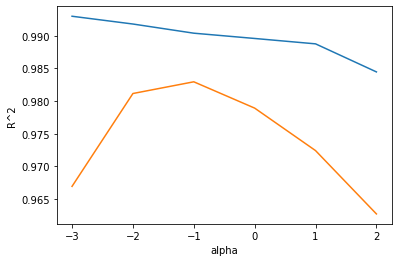

In [18]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘 모델을 임포트

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897812228260617
0.9800354016844837


In [20]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18809.85896925658, tolerance: 521.4272431818183
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12243.251848615027, tolerance: 521.4272431818183
  positive)


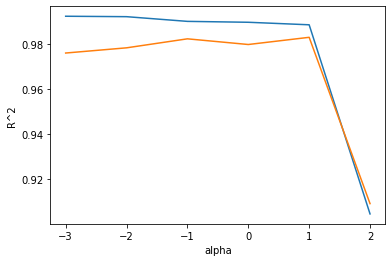

In [21]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [22]:
#사용되지 않는 특징의 개수
print(np.sum(lasso.coef_ == 0))

53
